In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [67]:
import pandas as pd
import scipy
import scipy.io
import numpy as np
from scipy import optimize
import math
from collections import Counter
#import knitro
import matplotlib.pyplot as plt
from sklearn.utils import resample
from statistics import stdev
from scipy.stats import gaussian_kde
import seaborn as sb

# set random seed
import random
random.seed(3600021601)

In [13]:
mat3 = scipy.io.loadmat('../inp/100markets3products.mat')  # load mat-file
eta3 = mat3['eta'] # Simulated unobserved error
alphas3 = mat3['alphas'] # Simulated alphas
P_opt3 = mat3['P_opt']
shares3 = mat3['shares']
w3 = mat3['w']
x1_3 = mat3['x1']
xi3 = mat3['xi_all'].flatten("F")
Z3 = mat3['Z']
prices_stacked3 = P_opt3.flatten("F")
shares_stacked3 = shares3.flatten("F")

#Create a df with product characteristics
df3 = pd.DataFrame(x1_3, columns = ['x0','x1','x2'])
df3['price'] = prices_stacked3
df3['share'] = shares_stacked3
df3['eta'] = eta3
df3['w'] = w3
df3['Z'] = Z3


In [14]:
# Now the 5 products data
mat5 = scipy.io.loadmat('../inp/100markets5products.mat')  # load mat5-file
eta5 = mat5['eta'] # Simulated unobserved error
alphas5 = mat5['alphas'] # Simulated alphas
P_opt5 = mat5['P_opt']
shares5 = mat5['shares']
w5 = mat5['w']
x1_5 = mat5['x1']
xi5 = mat5['xi_all'].flatten("F")
Z5 = mat5['Z']
prices_stacked5 = P_opt5.flatten("F")
shares_stacked5 = shares5.flatten("F")

#Create a df with product characteristics
df5 = pd.DataFrame(x1_5, columns = ['x0','x1','x2'])
df5['price'] = prices_stacked5
df5['share'] = shares_stacked5
df5['eta'] = eta5
df5['w'] = w5
df5['Z'] = Z5

## Distribution of prices

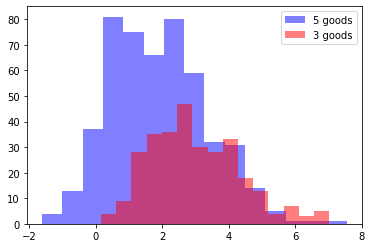

In [79]:
# Compare both histograms
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df5["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
#ax.set_title('Histogram for Prices')
ax.legend()

## Distribution of profits

In [16]:
df3['mc'] = 2 + df3['w'] + df3['Z'] + df3['eta']
df3['profitPerUnit'] = df3['price'] - df3['mc']
df3['profits'] = df3['profitPerUnit']*df3['share']

df5['mc'] = 2 + df5['w'] + df5['Z'] + df5['eta']
df5['profitPerUnit'] = df5['price'] - df5['mc']
df5['profits'] = df5['profitPerUnit']*df5['share']

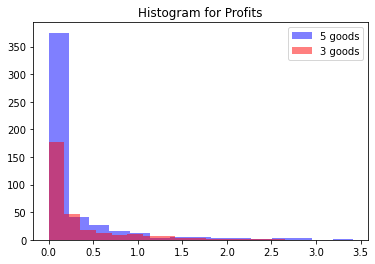

In [17]:
# Compare profits
fig, ax = plt.subplots()

ax.hist(df5["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
#ax.set_title('Histogram for Profits')
ax.legend()

## Consumer surplus

# Lets start with the 100 markets, 3 products scenario

$U_{jm}= X_{jm,0}\beta_0 + X_{jm,1}\beta_1 + X_{jm,2}\beta_2 - \alpha_i p_{jm} + \xi_{jm} + \epsilon_{ijm}$

In [20]:
random.seed(3600021601)
utilityMatrix = []
taste_shocks3 = []
for j in range(0,100):
    initialJ = j*3
    finalJ = (j+1)*3
    for i in range(0,500):
        #print(i)
        initialI = i*3 
        finalI = (i+1)*3
        alpha = alphas3[j,i]
        x0 = x1_3[initialJ:finalJ,0]
        x1 = x1_3[initialJ:finalJ,1]
        x2 = x1_3[initialJ:finalJ,2]
        xi = xi3[initialJ:finalJ,0]
        p1 = P_opt3[0,j]
        p2 = P_opt3[1,j]
        p3 = P_opt3[2,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1)         
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        
        utilities = [u0,u1,u2,u3]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append([u0,u1,u2,u3]) #,max_index,cs


In [21]:
df_utilityMatrix3 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3']) #,'choice','cs'
df_utilityMatrix3['choice']=df_utilityMatrix3.idxmax(axis=1)
df_utilityMatrix3['utility'] = df_utilityMatrix3.max(axis=1)


array([[<AxesSubplot:title={'center':'utility'}>]], dtype=object)

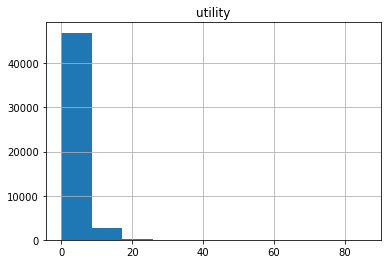

In [22]:
df_utilityMatrix3.hist(column='utility') #weird thing, probably wrong

In [23]:
random.seed(3600021601)
# Now for the 5 products
utilityMatrix = []
taste_shocks5 = []
for j in range(0,100):
    initialJ = j*5
    finalJ = (j+1)*5
    for i in range(0,500):
        #print(i)
        initialI = i*5 
        finalI = (i+1)*5
        alpha = alphas3[j,i]
        x0 = x1_5[initialJ:finalJ,0]
        x1 = x1_5[initialJ:finalJ,1]
        x2 = x1_5[initialJ:finalJ,2]
        x3 = x1_5[initialJ:finalJ,0]
        x4 = x1_5[initialJ:finalJ,1]
        xi = xi5[initialJ:finalJ]
        p1 = P_opt5[0,j]
        p2 = P_opt5[1,j]
        p3 = P_opt5[2,j]
        p4 = P_opt5[0,j]
        p5 = P_opt5[1,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1) 
        epsilon4 = np.random.lognormal(0,1)
        epsilon5 = np.random.lognormal(0,1)        
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        u4 = 5*x0[1] + x1[3] + x2[3] + xi[3] - alpha*p4 + epsilon4
        u5 = 5*x0[2] + x1[4] + x2[4] + xi[4] - alpha*p5 + epsilon5
        
        utilities = [u0,u1,u2,u3,u4,u5]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append(utilities) #,max_index,cs

In [24]:
df_utilityMatrix5 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3','u4','u5']) #,'choice','cs'
df_utilityMatrix5['choice']=df_utilityMatrix5.idxmax(axis=1)
df_utilityMatrix5['utility'] = df_utilityMatrix5.max(axis=1)

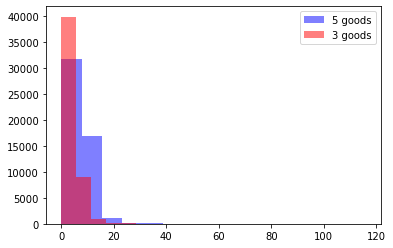

In [83]:
# Compare CS
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df_utilityMatrix5["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df_utilityMatrix3["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
#ax.set_title('Histogram for CS')
ax.legend()

# BLP and Hausman Instruments

## 2.

### 2.a)

$E[\xi_{jm}X_{jm}]$

In [28]:
np.mean(np.matmul(np.transpose(xi3),x1_3), axis=0)

array([13.03831111,  6.22257672, 10.65945097])

$E[\xi_{jm}p_{jm}]$

In [29]:
np.matmul(np.transpose(prices_stacked3),xi3)

array([88.48744114])

$E[\xi_{jm}\bar{p}_{jm}]$

In [30]:
hausman_vector = np.zeros(300)
for i in range(0,300):
    hausman_vector[i] = np.mean(np.delete(prices_stacked3, i))

In [31]:
np.mean(hausman_vector*xi3)

0.13153694769686025

$E[\xi_{jm}Z_{jm}]$

### 2.b) 

Only the $E[\xi_{jm}X_{jm}]$ moments seem to be (relatively) valid, since they are relatively small (<0.1). Both price moments give relatively large expected values, so they don't seem valid. 

### 2.c) 

It seems like the only reasonable instruments are the BLP ones, since its moment contition is close to zero. Hausman instruments give a high mean, so it's not OK to use them. 

# 2.2) 

I think that the moments should be:

$E[\xi_{jm}f(Z_{jm})]=0$

$E[\xi_{jm}f(x_{jm})]=0$

$E[\xi_{jm}f(w)]=0$

Note that, since we're using $X_{300\times3}$, $Z_{300\times1}$, and $W_{300\times1}$ as instruments, we'll need to estimate $\eta_{5\times1}$ in the objective function. 

Moreover, we'll be estimating 306 parameters through this procedure:

300 $\delta$s

5 $\eta$s

1 $\sigma_{\alpha}$

I'll use W = I, at least for now

In [32]:
## Create the instrument matrix

BLP_IV_1 = BLP_IV_2 = []
for i in range(0,300):
    if i in range(0, 300, 3):
        BLP_IV_1.append(x1_3[i+1,1] + x1_3[i+2,1])
        
    elif i in range(1, 300, 3):
        BLP_IV_1.append(x1_3[i-1,1] + x1_3[i+1,1])
        
    elif i in range(2, 300, 3):
        BLP_IV_1.append(x1_3[i-1,1] + x1_3[i-2,1])
        

BLP_IV_2 = []

for i in range(0,300):
    if i in range(0, 300, 3):
        BLP_IV_2.append(x1_3[i+1,2] + x1_3[i+2,2])
        
    elif i in range(1, 300, 3):
        BLP_IV_2.append(x1_3[i-1,2] + x1_3[i+1,2])
        
    elif i in range(2, 300, 3):
        BLP_IV_2.append(x1_3[i-1,2] + x1_3[i-2,2])

instrumentMatrix = np.concatenate((x1_3,np.array(BLP_IV_1).reshape(-1, 1),np.array(BLP_IV_2).reshape(-1, 1)),axis=1)
endogenousMatrix = np.concatenate((x1_3,prices_stacked3.reshape(-1, 1)), axis=1)

In [33]:
random.seed(3600021601)
R = 500
tasteShocks = np.random.lognormal(0,1,[100,R])
params = np.ones(306)

In [34]:
def objFunction(params):
    delta = params[0:300]
    eta = params[300:305]
    sigma = params[305]
    
    value = np.matmul(np.transpose(eta),eta)
    
    return(value)

### Constraints:

We will have 305 constraints as well. One for each $s_{jm}$ (there are 300 of them ), one for each $\eta$ (5 of them) 

In [37]:
## Start with shares constraints

def sharesConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    shares = []

    for j in range(0,300):
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu -maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu -maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu -maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 + np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked3-shares
    return(sharesDif)

sharesConstraints(params).shape        

(300,)

In [38]:
# Eta constraints
def etaConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]

    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    xi_hat = np.matmul(np.ones([300,300])-np.matmul(np.matmul(endogenousMatrix,np.linalg.inv(np.matmul(np.matmul(np.transpose(endogenousMatrix),P_matrix),endogenousMatrix))),np.matmul(np.transpose(endogenousMatrix),P_matrix)),deltaVector)

    moment = np.matmul(np.transpose(instrumentMatrix),xi_hat)/300
    
    constraint = etaVector - moment
    
    return(constraint)

In [39]:
def allConstraints(params):
    shares = sharesConstraints(params)
    etas   = etaConstraints(params)
    return np.concatenate((shares,etas), axis=0)

In [40]:
solution = scipy.optimize.minimize(objFunction, np.ones(306), constraints=({'type': 'eq', 'fun': allConstraints}))


In [41]:
# Just to test that the constraints make sense
solution.message

'Optimization terminated successfully'

In [42]:
# Now, from the minimizer I have param = (deltas, etas, sigma) 
# Back up Alpha and Betas 
delta_hat = solution.x[:300] # 300*1 vector
eta_hat = solution.x[300:305] # 5*1 vector
sigma_hat = solution.x[-1] # 1*1 vector
delta_hat = np.array([delta_hat])

P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta_orig = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 
alpha_beta_orig

array([[-0.33048897],
       [-0.05356198],
       [ 0.66060377],
       [ 0.10756234]])

## Time to code gradients and fun derivative matrices

In [43]:
def gradient(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    shares = []
    
    gradient = np.zeros(len(params))
    gradient[300:305] = 2*etaVector
    
    return(gradient)
    
    

In [44]:
## Start with shares constraints

def jacobianShares(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    jacobianMatrix = np.zeros([len(deltaVector),306])

    for j in range(0,300):   
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu -maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu -maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu -maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 + np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp
            sumexp_deltaMu_divided = exp_deltaMu1_divided*prices[0] + exp_deltaMu2_divided*prices[1] + exp_deltaMu3_divided*prices[2]

            one1 = (exp_deltaMu1_divided*(1-exp_deltaMu1_divided)).sum()/R
            one2 = -(exp_deltaMu1_divided*exp_deltaMu2_divided).sum()/R
            one3 = -(exp_deltaMu1_divided*exp_deltaMu3_divided).sum()/R
            oneSigma = ((exp_deltaMu1_divided*(prices[0]-sumexp_deltaMu_divided))*marketShocks).sum()/R
            
            two1 = -(exp_deltaMu2_divided*exp_deltaMu1_divided).sum()/R
            two2 = (exp_deltaMu2_divided*(1-exp_deltaMu2_divided)).sum()/R
            two3 = -(exp_deltaMu2_divided*exp_deltaMu3_divided).sum()/R
            twoSigma = ((exp_deltaMu2_divided*(prices[1]-sumexp_deltaMu_divided))*marketShocks).sum()/R 
            
            three1 = -(exp_deltaMu3_divided*exp_deltaMu1_divided).sum()/R
            three2 = -(exp_deltaMu3_divided*exp_deltaMu2_divided).sum()/R
            three3 = (exp_deltaMu3_divided*(1-exp_deltaMu3_divided)).sum()/R
            threeSigma = ((exp_deltaMu3_divided*(prices[2]-sumexp_deltaMu_divided))*marketShocks).sum()/R
            

            jacobianMatrix[j,j:j+3] = [one1, one2, one3]
            jacobianMatrix[j,300:] = np.append(np.zeros(5),oneSigma)
            
            jacobianMatrix[j+1,j:j+3]= [two1, two2, two3]
            jacobianMatrix[j+1,300:] = np.append(np.zeros(5),twoSigma)
            
            jacobianMatrix[j+2,j:j+3] = [three1,three2,three3]
            jacobianMatrix[j+2,300:] = np.append(np.zeros(5),threeSigma)
            
    return(jacobianMatrix)

In [45]:
def jacobianEtas(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    jacobianMatrix = np.zeros([len(etaVector),306])

    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    A = np.ones([300,300])-np.matmul(np.matmul(endogenousMatrix,np.linalg.inv(np.matmul(np.matmul(np.transpose(endogenousMatrix),P_matrix),endogenousMatrix))),np.matmul(np.transpose(endogenousMatrix),P_matrix))    

    deltasMatrix = np.transpose(np.matmul(A,instrumentMatrix))/300
    jacobianMatrix[:,0:300] = deltasMatrix
    jacobianMatrix[:,300:305] = -np.ones([5,5])
    jacobianMatrix[:,305] = np.zeros(5)
    
    return(jacobianMatrix)
    
jacobianEtas(params).shape

(5, 306)

In [46]:
# Function that gathers all the jacobians
def ultimateJacobian(params):
    jacobianMatrix = np.zeros([305,306])
    
    jacobianMatrix[0:300,:] = jacobianShares(params)
    jacobianMatrix[300:,:] = jacobianEtas(params)
    
    return(jacobianMatrix)
ultimateJacobian(params).shape

(305, 306)

In [47]:
solution2 = scipy.optimize.minimize(objFunction, np.ones(306)*0.2, jac = gradient, constraints=({'type': 'eq', 'fun': allConstraints, 'jac':ultimateJacobian}))#


In [48]:
solution2.message
# Didn't work :(

'Singular matrix C in LSQ subproblem'

### Compare different initial conditions

In [218]:
solutino_initial1 = scipy.optimize.minimize(objFunction, np.ones(306), jac = gradient, constraints=({'type': 'eq', 'fun': allConstraints}))#, 'jac':ultimateJacobian
delta_hat = solutino_initial1.x[:300] # 300*1 vector
eta_hat = solutino_initial1.x[300:305] # 5*1 vector
sigma_hat = solution.x[-1] # 1*1 vector
delta_hat = np.array([delta_hat])

XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 
alpha_beta

In [220]:
solution_initial0 = scipy.optimize.minimize(objFunction, np.zeros(306), jac = gradient, constraints=({'type': 'eq', 'fun': allConstraints}))#, 'jac':ultimateJacobian
delta_hat = solution_initial0.x[:300] # 300*1 vector
eta_hat = solution_initial0.x[300:305] # 5*1 vector
sigma_hat = solution.x[-1] # 1*1 vector
delta_hat = np.array([delta_hat])

XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 
alpha_beta

In [224]:
random.seed(3600021601)
solution_random = scipy.optimize.minimize(objFunction, np.random.rand(306), jac = gradient, constraints=({'type': 'eq', 'fun': allConstraints}))#, 'jac':ultimateJacobian
delta_hat = solution_initial0.x[:300] # 300*1 vector
eta_hat = solution_initial0.x[300:305] # 5*1 vector
sigma_hat = solution.x[-1] # 1*1 vector
delta_hat = np.array([delta_hat])

XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 
alpha_beta

In [45]:
# Bootrstrapping to get SE
num_iter = 1000
alpha = []
beta_0 = []
beta_1 = []
beta_2 = []

random.seed(3600021601)
for i in range(num_iter):
    #print(i)
    df_sample = resample(df3,replace=True, n_samples=len(df3)).reset_index(drop = True)

    X2 = df_sample['x1'].tolist()
    X3 = df_sample['x2'].tolist()

    BLP_IV_1 = BLP_IV_2 = []
    for i in range(0,300):
        if i in range(0, 300, 3):
            BLP_IV_1.append(X2[i+1] + X2[i+2])

        elif i in range(1, 300, 3):
            BLP_IV_1.append(X2[i-1] + X2[i+1])

        elif i in range(2, 300, 3):
            BLP_IV_1.append(X2[i-1] + X2[i-2])


    BLP_IV_2 = []

    for i in range(0,300):
        if i in range(0, 300, 3):
            BLP_IV_2.append(X3[i+1] + X3[i+2])

        elif i in range(1, 300, 3):
            BLP_IV_2.append(X3[i-1] + X3[i+1])

        elif i in range(2, 300, 3):
            BLP_IV_2.append(X3[i-1] + X3[i-2])

    BLP_IV_1 = np.array(BLP_IV_1).reshape(-1,1)
    BLP_IV_2 = np.array(BLP_IV_2).reshape(-1,1)
    X1 = np.array(df_sample['x0'].tolist()).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    X3 = np.array(X3).reshape(-1,1)
    prices = np.array(df_sample['price'].tolist()).reshape(-1,1)
    instrumentMatrix = np.concatenate((X1, X2, X3, BLP_IV_1, BLP_IV_2),axis=1)
    endogenousMatrix = np.concatenate((X1, X2, X3,prices),axis=1)
    
    solution_iter = scipy.optimize.minimize(objFunction, np.ones(306), constraints=({'type': 'eq', 'fun': allConstraints}))
    delta_hat = solution_iter.x[:300] # 300*1 vector
    eta_hat = solution_iter.x[300:305] # 5*1 vector
    sigma_hat = solution_iter.x[-1] # 1*1 vector
    delta_hat = np.array([delta_hat])
    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    
    XPz = np.matmul(P_matrix, endogenousMatrix)
    XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
    XPzX_inv = np.linalg.inv(XPzX)

    XPzdelta = np.matmul(delta_hat,XPz)
    
    alpha_beta_iter = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with beta_0, beta_1, beta_2, alpha
    
    beta_0.append(alpha_beta_iter[0][0])
    beta_1.append(alpha_beta_iter[1][0])
    beta_2.append(alpha_beta_iter[2][0])
    alpha.append(alpha_beta_iter[3][0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [46]:
se_b_0 = stdev(beta_0)
se_b_1 = stdev(beta_1)
se_b_2 = stdev(beta_2)
se_a = stdev(alpha)

In [47]:
print(f'alpha: {alpha_beta_orig[3]} with s.e. {se_a}')
print(f'beta 0: {alpha_beta_orig[0]} with s.e. {se_b_0}')
print(f'beta 1: {alpha_beta_orig[1]} with s.e. {se_b_1}')
print(f'beta 2: {alpha_beta_orig[2]} with s.e. {se_b_2}')


alpha: [0.09841488] with s.e. 2.0900173305973517
beta 0: [-0.30555782] with s.e. 5.739144127559052
beta 1: [-0.04859676] with s.e. 1.4011094413285718
beta 2: [0.66394958] with s.e. 0.2865817199436205


## Now I do it with the 10 markets

In [86]:
# Now the 10M products data
mat10M = scipy.io.loadmat('../inp/10markets3products.mat')  # load mat10M-file
eta10M = mat10M['eta'] # Simulated unobserved error
alphas10M = mat10M['alphas'] # Simulated alphas
P_opt10M = mat10M['P_opt']
shares10M = mat10M['shares']
w10M = mat10M['w']
x1_10M = mat10M['x1']
xi10M = mat10M['xi_all'].flatten("F")
Z10M = mat10M['Z']
prices_stacked10M = P_opt10M.flatten("F")
shares_stacked10M = shares10M.flatten("F")

#Create a df with product characteristics
df10M = pd.DataFrame(x1_10M, columns = ['x0','x1','x2'])
df10M['price'] = prices_stacked10M
df10M['share'] = shares_stacked10M
df10M['eta'] = eta10M
df10M['w'] = w10M
df10M['Z'] = Z10M

In [87]:
## Let's create the instrument matrix

BLP_IV_1 = BLP_IV_2 = []
for i in range(0,30):
    if i in range(0, 30, 3):
        BLP_IV_1.append(x1_10M[i+1,1] + x1_10M[i+2,1])
        
    elif i in range(1, 300, 3):
        BLP_IV_1.append(x1_10M[i-1,1] + x1_10M[i+1,1])
        
    elif i in range(2, 300, 3):
        BLP_IV_1.append(x1_10M[i-1,1] + x1_10M[i-2,1])
        

BLP_IV_2 = []

for i in range(0,30):
    if i in range(0, 30, 3):
        BLP_IV_2.append(x1_10M[i+1,2] + x1_10M[i+2,2])
        
    elif i in range(1, 30, 3):
        BLP_IV_2.append(x1_10M[i-1,2] + x1_10M[i+1,2])
        
    elif i in range(2, 30, 3):
        BLP_IV_2.append(x1_10M[i-1,2] + x1_10M[i-2,2])

instrumentMatrix = np.concatenate((x1_10M,np.array(BLP_IV_1).reshape(-1, 1),np.array(BLP_IV_2).reshape(-1, 1)),axis=1)
endogenousMatrix = np.concatenate((x1_10M,prices_stacked10M.reshape(-1, 1)), axis=1)

In [88]:
random.seed(3600021601)
R = 500
tasteShocks = np.random.lognormal(0,1,[10,R])
params = np.ones(306)

# 2.3)

In [90]:
def objFunction(params):
    delta = params[0:30]
    eta = params[30:35]
    sigma = params[35]
    
    value = np.matmul(np.transpose(eta),eta)
    
    return(value)

In [91]:
## Start with shares constraints

def sharesConstraints(params):
    deltaVector = params[0:30]
    etaVector = params[30:35]
    sigma = params[35]
    shares = []

    for j in range(0,30):
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu -maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu -maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu -maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 + np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked10M-shares
    return(sharesDif)

sharesConstraints(params).shape        

(30,)

In [92]:
# Eta constraints
def etaConstraints(params):
    deltaVector = params[0:30]
    etaVector = params[30:35]
    sigma = params[35]

    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    xi_hat = np.matmul(np.ones([30,30])-np.matmul(np.matmul(endogenousMatrix,np.linalg.inv(np.matmul(np.matmul(np.transpose(endogenousMatrix),P_matrix),endogenousMatrix))),np.matmul(np.transpose(endogenousMatrix),P_matrix)),deltaVector)

    moment = np.matmul(np.transpose(instrumentMatrix),xi_hat)/30
    
    constraint = etaVector - moment
    
    return(constraint)

In [93]:
def allConstraints(params):
    shares = sharesConstraints(params)
    etas   = etaConstraints(params)
    return np.concatenate((shares,etas), axis=0)

In [4]:
solution_10M = scipy.optimize.minimize(objFunction, np.ones(36), constraints=({'type': 'eq', 'fun': allConstraints}))
solution_10M.message

NameError: name 'scipy' is not defined

In [96]:
# Now, from the minimizer I have param = (deltas, etas, sigma) 
# I can then finally back up Alpha and Betas 
delta_hat_10M = solution_10M.x[:30] # 300*1 vector
eta_hat_10M = solution_10M.x[30:35] # 5*1 vector
sigma_hat_10M = solution_10M.x[-1] # 1*1 vector
delta_hat_10M = np.array([delta_hat_10M])

P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat_10M,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta_10M = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 
alpha_beta_10M

array([[ 3.20110978],
       [ 0.53371487],
       [ 1.25111064],
       [-1.45847508]])

In [97]:
# Bootrstrapping to get SE
num_iter = 1000
alpha = []
beta_0 = []
beta_1 = []
beta_2 = []

random.seed(3600021601)
for i in range(num_iter):
    #print(i)
    df_sample = resample(df10M,replace=True, n_samples=len(df10M)).reset_index(drop = True)
    X2 = df_sample['x1'].tolist()
    X3 = df_sample['x2'].tolist()

    BLP_IV_1 = BLP_IV_2 = []
    for i in range(0,30):
        if i in range(0, 30, 3):
            BLP_IV_1.append(X2[i+1] + X2[i+2])o

        elif i in range(1, 30, 3):
            BLP_IV_1.append(X2[i-1] + X2[i+1])

        elif i in range(2, 30, 3):
            BLP_IV_1.append(X2[i-1] + X2[i-2])


    BLP_IV_2 = []

    for i in range(0,30):
        if i in range(0, 30, 3):
            BLP_IV_2.append(X3[i+1] + X3[i+2])

        elif i in range(1, 30, 3):
            BLP_IV_2.append(X3[i-1] + X3[i+1])

        elif i in range(2, 30, 3):
            BLP_IV_2.append(X3[i-1] + X3[i-2])

    BLP_IV_1 = np.array(BLP_IV_1).reshape(-1,1)
    BLP_IV_2 = np.array(BLP_IV_2).reshape(-1,1)
    X1 = np.array(df_sample['x0'].tolist()).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    X3 = np.array(X3).reshape(-1,1)
    prices = np.array(df_sample['price'].tolist()).reshape(-1,1)
    instrumentMatrix = np.concatenate((X1, X2, X3, BLP_IV_1, BLP_IV_2),axis=1)
    endogenousMatrix = np.concatenate((X1, X2, X3,prices),axis=1)
    
    solution_iter = scipy.optimize.minimize(objFunction, np.ones(36), constraints=({'type': 'eq', 'fun': allConstraints}))
    delta_hat = solution_iter.x[:30] # 30*1 vector
    eta_hat = solution_iter.x[30:35] # 5*1 vector
    sigma_hat = solution_iter.x[-1] # 1*1 vector
    delta_hat = np.array([delta_hat])
    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    
    XPz = np.matmul(P_matrix, endogenousMatrix)
    XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
    XPzX_inv = np.linalg.inv(XPzX)

    XPzdelta = np.matmul(delta_hat,XPz)o
    
    alpha_beta_iter = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with beta_0, beta_1, beta_2, alpha
    
    beta_0.append(alpha_beta_iter[0][0])
    beta_1.append(alpha_beta_iter[1][0])
    beta_2.append(alpha_beta_iter[2][0])
    alpha.append(alpha_beta_iter[3][0])

0
1
2
3
4


/tmp/ipykernel_161730/151684854.py:24: RuntimeWarning: invalid value encountered in divide
  exp_deltaMu1_divided = exp_deltaMu1/sumExp
/tmp/ipykernel_161730/151684854.py:25: RuntimeWarning: invalid value encountered in divide
  exp_deltaMu2_divided = exp_deltaMu2/sumExp
/tmp/ipykernel_161730/151684854.py:26: RuntimeWarning: invalid value encountered in divide
  exp_deltaMu3_divided = exp_deltaMu3/sumExp
/tmp/ipykernel_161730/151684854.py:23: RuntimeWarning: overflow encountered in exp
  sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 + np.exp(-maxDeltaMu)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


In [98]:
se_b_0 = stdev(beta_0)
se_b_1 = stdev(beta_1)
se_b_2 = stdev(beta_2)
se_a = stdev(alpha)

In [2]:
print(f'alpha: {alpha_beta_10M[3]} with s.e. {se_a}')
print(f'beta 0: {alpha_beta_10M[0]} with s.e. {se_b_0}')
print(f'beta 1: {alpha_beta_10M[1]} with s.e. {se_b_1}')
print(f'beta 2: {alpha_beta_10M[2]} with s.e. {se_b_2}')

NameError: name 'alpha_beta_10M' is not defined


## Price elasticity

Own-price elasticity is $\frac{\partial s_j}{\partial p_j} = \int \tau_j(1-\tau_j)\sigma\nu_i d\nu_i$ 

Cross-price elasticity is:  $\frac{\partial s_j}{\partial p_k} = \int -\tau_j\tau_k\sigma\nu_i d\nu_i$


In [53]:
## Start with shares constraints

def elasticities(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    ownElasticityVector = []

    for j in range(0,300):   
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu -maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu -maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu -maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 + np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp
            sumexp_deltaMu_divided = exp_deltaMu1_divided*prices[0] + exp_deltaMu2_divided*prices[1] + exp_deltaMu3_divided*prices[2]

            oneSigma = ((exp_deltaMu1_divided*(prices[0]-sumexp_deltaMu_divided))*marketShocks).sum()/R            
            twoSigma = ((exp_deltaMu2_divided*(prices[1]-sumexp_deltaMu_divided))*marketShocks).sum()/R             
            threeSigma = ((exp_deltaMu3_divided*(prices[2]-sumexp_deltaMu_divided))*marketShocks).sum()/R
            
            ownElasticityVector.append(oneSigma)
            ownElasticityVector.append(twoSigma)
            ownElasticityVector.append(threeSigma)
    return(ownElasticityVector)

In [56]:
estimatedOwnElasticities = np.array(elasticities(solution.x))

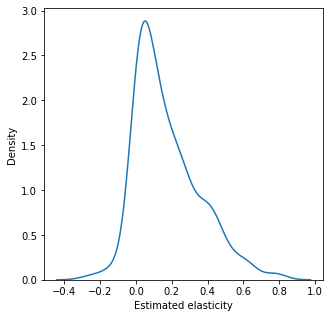

In [78]:
plt.figure(figsize = (5,5))
sb.kdeplot(estimatedOwnElasticities , fill = False)
plt.xlabel('Estimated elasticity')
plt.show()